In [99]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')
data=pd.read_csv('placedata v2.0 synthetic.csv')
sns.set()
sns.set_style('whitegrid')
sns.set_palette('bright')

In [100]:
data = pd.read_csv('./placedata v2.0 synthetic.csv')
data.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [101]:
data.drop(labels=['StudentID'], axis=1, inplace=True)
data.head()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [118]:
data.describe().round(2)

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,7.70,1.05,2.03,1.01,79.45,4.32,0.59,0.73,69.16,74.50
std,0.64,0.67,0.87,0.90,8.16,0.41,0.49,0.44,10.43,8.92
min,6.50,0.00,0.00,0.00,60.00,3.00,0.00,0.00,55.00,57.00
25%,7.40,1.00,1.00,0.00,73.00,4.00,0.00,0.00,59.00,67.00
50%,7.70,1.00,2.00,1.00,80.00,4.40,1.00,1.00,70.00,73.00
75%,8.20,1.00,3.00,2.00,87.00,4.70,1.00,1.00,78.00,83.00
max,9.10,2.00,3.00,3.00,90.00,4.80,1.00,1.00,90.00,88.00


In [102]:
data.isnull().sum()

CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64

In [103]:
numerical_cols = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_cols = [feature for feature in data.columns if data[feature].dtype == 'O']

categorical_classes = {}

In [104]:
numerical_cols

['CGPA',
 'Internships',
 'Projects',
 'Workshops/Certifications',
 'AptitudeTestScore',
 'SoftSkillsRating',
 'SSC_Marks',
 'HSC_Marks']

In [105]:
categorical_cols

['ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus']

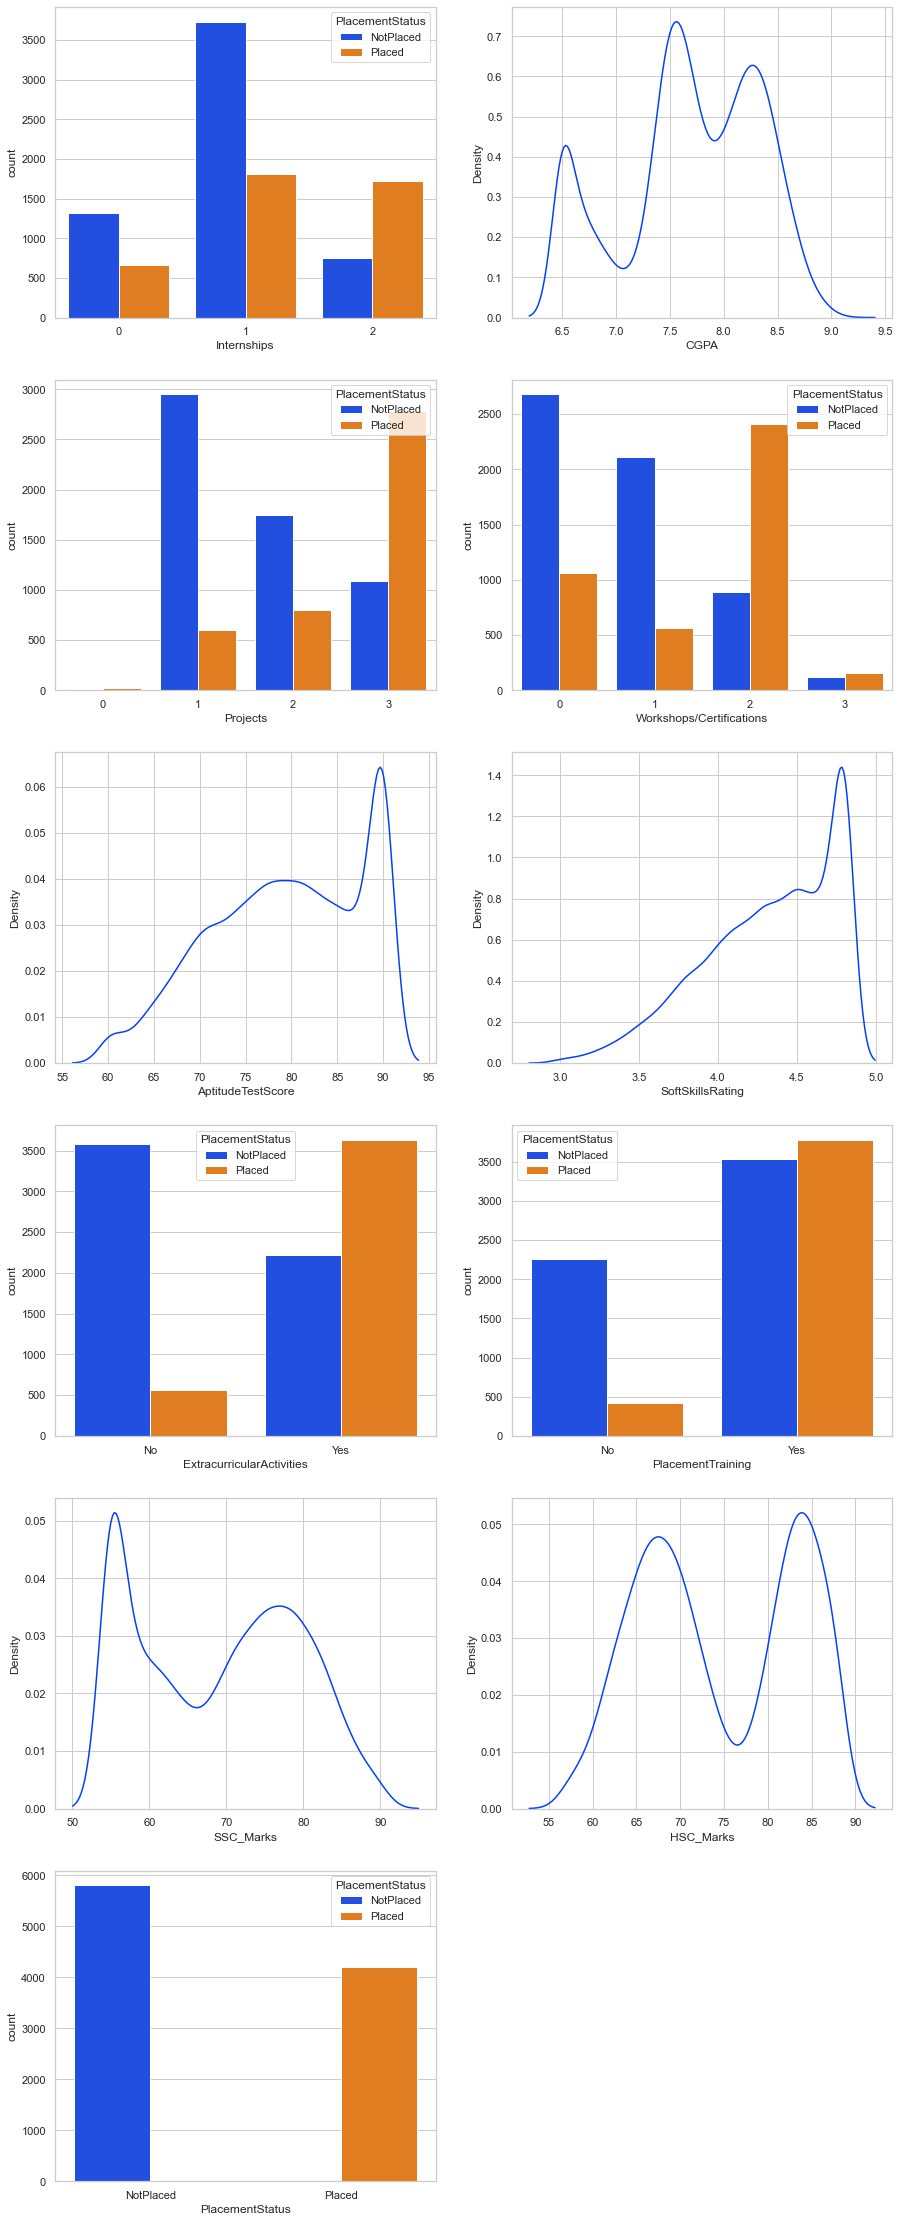

In [106]:
fig, ax = plt.subplots(6, 2)
fig.set_figheight(40)
fig.set_figwidth(15)

sns.countplot(x=data['Internships'], ax=ax[0,0], hue=data['PlacementStatus'])
sns.kdeplot(data['CGPA'], ax=ax[0,1])
sns.countplot(x=data['Projects'], ax=ax[1,0], hue=data['PlacementStatus'])
sns.countplot(x=data['Workshops/Certifications'], ax=ax[1,1], hue=data['PlacementStatus'])
sns.kdeplot(data['AptitudeTestScore'], ax=ax[2,0])
sns.kdeplot(data['SoftSkillsRating'], ax=ax[2,1])
sns.countplot(x=data['ExtracurricularActivities'], ax=ax[3,0], hue=data['PlacementStatus'])
sns.countplot(x=data['PlacementTraining'], ax=ax[3,1], hue=data['PlacementStatus'])
sns.kdeplot(data['SSC_Marks'], ax=ax[4,0])
sns.kdeplot(data['HSC_Marks'], ax=ax[4,1])
sns.countplot(x=data['PlacementStatus'], ax=ax[5,0], hue=data['PlacementStatus'])
ax[5,1].set_axis_off()
plt.show()

In [107]:
from sklearn.preprocessing import LabelEncoder

In [108]:
le = LabelEncoder()
for i in categorical_cols:
  if i != 'PlacementStatus':
    data[i] = le.fit_transform(data[i])
    categorical_classes[i] = le.classes_

data.head()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,7.5,1,1,1,65,4.4,0,0,61,79,NotPlaced
1,8.9,0,3,2,90,4.0,1,1,78,82,Placed
2,7.3,1,2,2,82,4.8,1,0,79,80,NotPlaced
3,7.5,1,1,2,85,4.4,1,1,81,80,Placed
4,8.3,1,2,2,86,4.5,1,1,74,88,Placed


In [109]:
categorical_classes

{'ExtracurricularActivities': array(['No', 'Yes'], dtype=object),
 'PlacementTraining': array(['No', 'Yes'], dtype=object)}

In [110]:
correlation_matrix = data.drop(labels=['PlacementStatus'], axis=1).corr()
correlation_matrix

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks
CGPA,1.000000,0.280601,0.435928,0.349686,0.461250,0.383547,0.444130,0.251628,0.404971,0.462313
Internships,0.280601,1.000000,0.309196,0.279110,0.320725,0.273691,0.274960,0.153547,0.279837,0.317149
Projects,0.435928,0.309196,1.000000,0.377865,0.540339,0.450294,0.491430,0.293709,0.499421,0.535708
Workshops/Certifications,0.349686,0.279110,0.377865,1.000000,0.388061,0.342397,0.373926,0.180333,0.373045,0.418442
AptitudeTestScore,0.461250,0.320725,0.540339,0.388061,1.000000,0.515400,0.474130,0.314772,0.513044,0.565105
SoftSkillsRating,0.383547,0.273691,0.450294,0.342397,0.515400,1.000000,0.448049,0.235571,0.430734,0.466912
ExtracurricularActivities,0.444130,0.274960,0.491430,0.373926,0.474130,0.448049,1.000000,0.327158,0.517850,0.533572
PlacementTraining,0.251628,0.153547,0.293709,0.180333,0.314772,0.235571,0.327158,1.000000,0.257440,0.325434
SSC_Marks,0.404971,0.279837,0.499421,0.373045,0.513044,0.430734,0.517850,0.257440,1.000000,0.524916
HSC_Marks,0.462313,0.317149,0.535708,0.418442,0.565105,0.466912,0.533572,0.325434,0.524916,1.000000


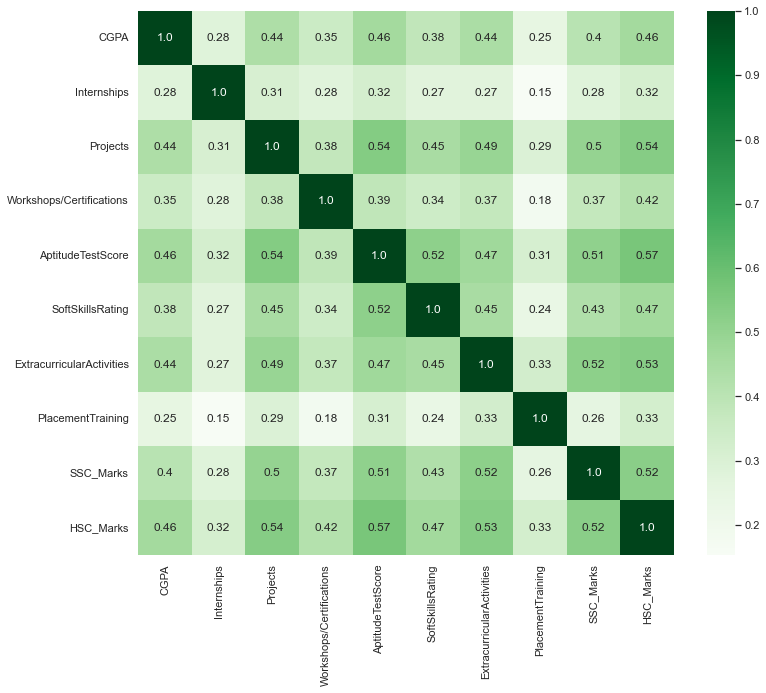

In [116]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(12)
sns.heatmap(correlation_matrix, annot=True, fmt=".2", cmap='Greens')
plt.show()

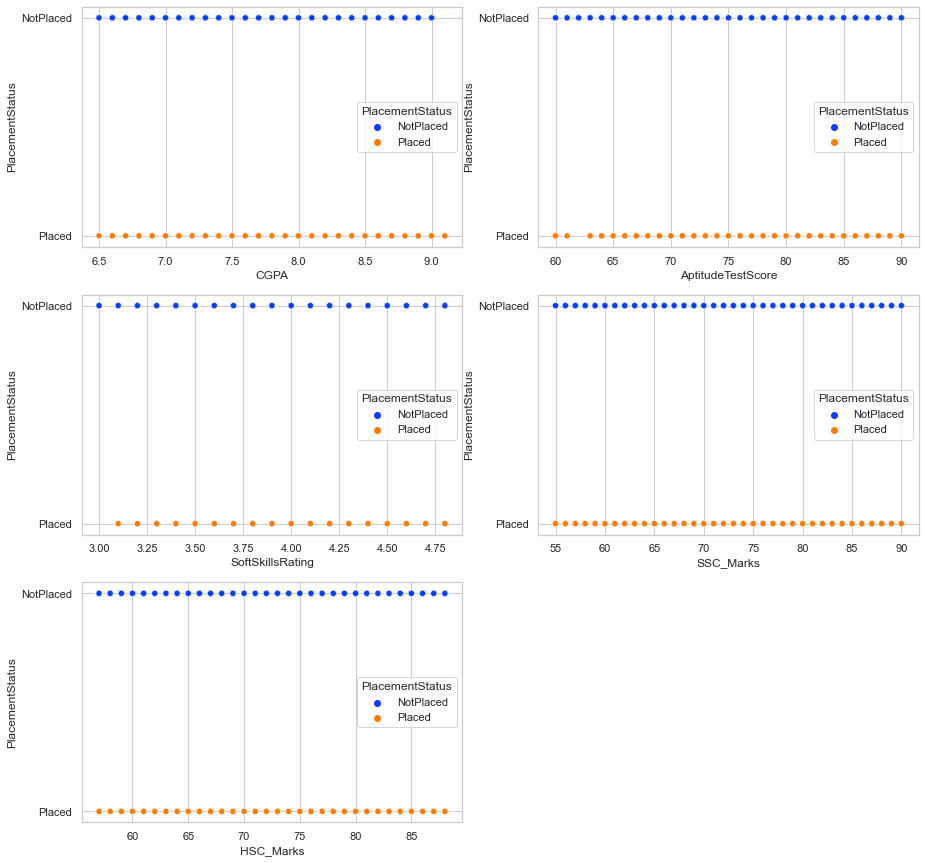

In [122]:
fig, ax = plt.subplots(3,2)
fig.set_figwidth(15)
fig.set_figheight(15)

sns.scatterplot(x=data['CGPA'], y=data['PlacementStatus'], ax=ax[0,0], hue=data['PlacementStatus'])
sns.scatterplot(x=data['AptitudeTestScore'], y=data['PlacementStatus'], ax=ax[0,1], hue=data['PlacementStatus'])
sns.scatterplot(x=data['SoftSkillsRating'], y=data['PlacementStatus'], ax=ax[1,0], hue=data['PlacementStatus'])
sns.scatterplot(x=data['SSC_Marks'], y=data['PlacementStatus'], ax=ax[1,1], hue=data['PlacementStatus'])
sns.scatterplot(x=data['HSC_Marks'], y=data['PlacementStatus'], ax=ax[2,0], hue=data['PlacementStatus'])
ax[2,1].set_axis_off()

plt.show()